# Import Required Libraries
Import libraries such as NumPy, Pandas, Matplotlib, TensorFlow, Keras, and others required for data processing, visualization, and model building.

In [8]:
# Import necessary libraries for data processing, visualization, and model building
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import seaborn as sns
from PIL import Image
from PIL import ImageEnhance
from skimage.io import imread
import os
import random
import pathlib
import warnings
import itertools
import math

# Suppress warnings
warnings.filterwarnings("ignore")

# Download and Verify Dataset
Use KaggleHub to download the PlantVillage dataset and verify its directory structure using `os.listdir()`.

In [9]:
# Download the PlantVillage dataset using KaggleHub
import kagglehub

# Download the dataset
dataset_path = kagglehub.dataset_download("abdallahalidev/plantvillage-dataset")

# Print the path to the downloaded dataset files
print("Path to dataset files:", dataset_path)

# Verify the dataset directory structure
print("Dataset directory contents:", os.listdir(dataset_path))

Path to dataset files: C:\Users\vaisa\.cache\kagglehub\datasets\abdallahalidev\plantvillage-dataset\versions\3
Dataset directory contents: ['plantvillage dataset']


# Prepare Training and Validation Data
Use `tf.keras.preprocessing.image_dataset_from_directory` to load and preprocess the training and validation datasets.

Classes in the dataset: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___healthy', 'Corn_(maize)___Northern_Leaf_Blight', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___healthy', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___healthy', 'Strawberry___Leaf_scorch', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___healthy', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites T

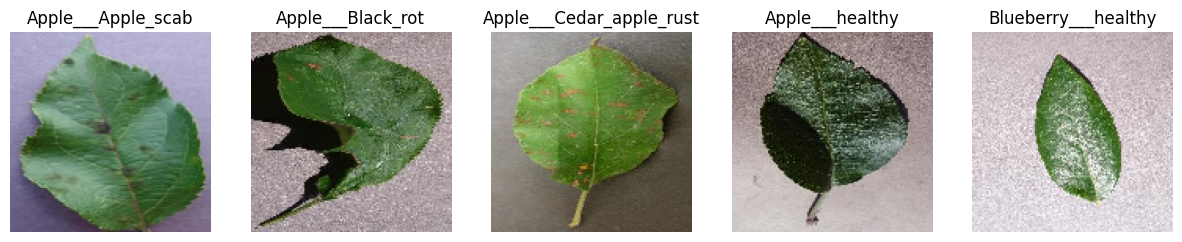

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Define the path to the dataset images
image_dir = os.path.join(dataset_path, "plantvillage dataset\\color")

# List the subdirectories (classes) in the dataset
classes = os.listdir(image_dir)
print("Classes in the dataset:", classes)

# Visualize some sample images from each class
def visualize_samples(image_dir, classes, num_samples=5):
    plt.figure(figsize=(15, 10))
    for i, class_name in enumerate(classes[:num_samples]):
        class_path = os.path.join(image_dir, class_name)
        sample_image = os.listdir(class_path)[0]  # Take the first image from the class
        sample_image_path = os.path.join(class_path, sample_image)
        img = load_img(sample_image_path, target_size=(128, 128))  # Resize for visualization
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(img)
        plt.title(class_name)
        plt.axis("off")
    plt.show()

# Call the function to visualize samples
visualize_samples(image_dir, classes)

# Build the GoogleNet Model
Define the AlexNet architecture using the Sequential API, including convolutional layers, max-pooling, batch normalization, dense layers, and dropout.

In [11]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dropout, Dense, Flatten, Input, concatenate, GlobalAveragePooling2D, BatchNormalization, Activation
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import os


# Define image dimensions and batch size
IMG_HEIGHT, IMG_WIDTH = 224, 224  # Match AlexNet input size
BATCH_SIZE = 32

# Create data generators for augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0, 1]
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.3  # Reserve 30% of data for validation
)

# Create training and validation generators
train_generator = train_datagen.flow_from_directory(
    image_dir,  # Path to the dataset directory
    target_size=(IMG_HEIGHT, IMG_WIDTH),  # Resize images to 224x224
    batch_size=BATCH_SIZE,
    class_mode='sparse',  # Use sparse categorical labels
    subset='training'  # Use the training subset
)

val_generator = train_datagen.flow_from_directory(
    image_dir,  # Path to the dataset directory
    target_size=(IMG_HEIGHT, IMG_WIDTH),  # Resize images to 224x224
    batch_size=BATCH_SIZE,
    class_mode='sparse',  # Use sparse categorical labels
    subset='validation'  # Use the validation subset
)

# Print dataset information
print("Training set size:", train_generator.samples)
print("Validation set size:", val_generator.samples)

# Build the AlexNet Model
def inception_module(x, f1, f3r, f3, f5r, f5, pool_proj):
    path1 = Conv2D(f1, (1, 1), padding='same', activation='relu')(x)

    path2 = Conv2D(f3r, (1, 1), padding='same', activation='relu')(x)
    path2 = Conv2D(f3, (3, 3), padding='same', activation='relu')(path2)

    path3 = Conv2D(f5r, (1, 1), padding='same', activation='relu')(x)
    path3 = Conv2D(f5, (5, 5), padding='same', activation='relu')(path3)

    path4 = MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    path4 = Conv2D(pool_proj, (1, 1), padding='same', activation='relu')(path4)

    return concatenate([path1, path2, path3, path4], axis=3)

#


# Define image dimensions and batch size
IMG_HEIGHT, IMG_WIDTH = 224, 224  # Match AlexNet input size
BATCH_SIZE = 32

# Create data generators for augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0, 1]
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.3  # Reserve 30% of data for validation
)

# Create training and validation generators
train_generator = train_datagen.flow_from_directory(
    image_dir,  # Path to the dataset directory
    target_size=(IMG_HEIGHT, IMG_WIDTH),  # Resize images to 224x224
    batch_size=BATCH_SIZE,
    class_mode='sparse',  # Use sparse categorical labels
    subset='training'  # Use the training subset
)

val_generator = train_datagen.flow_from_directory(
    image_dir,  # Path to the dataset directory
    target_size=(IMG_HEIGHT, IMG_WIDTH),  # Resize images to 224x224
    batch_size=BATCH_SIZE,
    class_mode='sparse',  # Use sparse categorical labels
    subset='validation'  # Use the validation subset
)

# Print dataset information
print("Training set size:", train_generator.samples)
print("Validation set size:", val_generator.samples)

def inception_module(x, f1, f3r, f3, f5r, f5, pool_proj):
    path1 = Conv2D(f1, (1, 1), padding='same', activation='relu')(x)

    path2 = Conv2D(f3r, (1, 1), padding='same', activation='relu')(x)
    path2 = Conv2D(f3, (3, 3), padding='same', activation='relu')(path2)

    path3 = Conv2D(f5r, (1, 1), padding='same', activation='relu')(x)
    path3 = Conv2D(f5, (5, 5), padding='same', activation='relu')(path3)

    path4 = MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    path4 = Conv2D(pool_proj, (1, 1), padding='same', activation='relu')(path4)

    return concatenate([path1, path2, path3, path4], axis=3)
input_layer = Input(shape=(IMG_HEIGHT, IMG_WIDTH, 3))

x = Conv2D(64, (7, 7), strides=(2, 2), padding='same', activation='relu')(input_layer)
x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
x = BatchNormalization()(x)

x = Conv2D(64, (1, 1), activation='relu')(x)
x = Conv2D(192, (3, 3), padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

# Inception modules
x = inception_module(x, 64, 96, 128, 16, 32, 32)
x = inception_module(x, 128, 128, 192, 32, 96, 64)
x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

x = inception_module(x, 192, 96, 208, 16, 48, 64)
x = inception_module(x, 160, 112, 224, 24, 64, 64)
x = inception_module(x, 128, 128, 256, 24, 64, 64)
x = inception_module(x, 112, 144, 288, 32, 64, 64)
x = inception_module(x, 256, 160, 320, 32, 128, 128)
x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

x = inception_module(x, 256, 160, 320, 32, 128, 128)
x = inception_module(x, 384, 192, 384, 48, 128, 128)

x = GlobalAveragePooling2D()(x)
x = Dropout(0.4)(x)
output_layer = Dense(len(train_generator.class_indices), activation='softmax')(x)

model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()


Found 38029 images belonging to 38 classes.
Found 16276 images belonging to 38 classes.
Training set size: 38029
Validation set size: 16276
Found 38029 images belonging to 38 classes.
Found 16276 images belonging to 38 classes.
Training set size: 38029
Validation set size: 16276


Model: "functional_29"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 112, 112,  │      9,472 │ input_layer_1[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 56, 56,    │          0 │ conv2d_5[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 56, 56,    │        256 │ max_pooling2d_3[… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 56, 56,    │      4,160 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 56, 56,    │    110,784 │ conv2d_6[0][0]    │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 56, 56,    │        768 │ conv2d_7[0][0]    │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_4     │ (None, 28, 28,    │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 28, 28,    │     18,528 │ max_pooling2d_4[… │
│                     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_11 (Conv2D)  │ (None, 28, 28,    │      3,088 │ max_pooling2d_4[… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_5     │ (None, 28, 28,    │          0 │ max_pooling2d_4[… │
│ (MaxPooling2D)      │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 28, 28,    │     12,352 │ max_pooling2d_4[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_10 (Conv2D)  │ (None, 28, 28,    │    110,720 │ conv2d_9[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_12 (Conv2D)  │ (None, 28, 28,    │     12,832 │ conv2d_11[0][0]   │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_13 (Conv2D)  │ (None, 28, 28,    │      6,176 │ max_pooling2d_5[… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 28, 28,    │          0 │ conv2d_8[0][0],   │
│ (Concatenate)       │ 256)              │            │ conv2d_10[0][0],  │
│                     │                   │            │ conv2d_12[0][0],  │
│                     │                   │            │ conv2d_13[0][0] 

 Total params: 6,013,526 (22.94 MB)

 Trainable params: 6,013,014 (22.94 MB)

 Non-trainable params: 512 (2.00 KB)

# Compile and Train the Model
Compile the model with the Adam optimizer and sparse categorical cross-entropy loss, and train it using the `fit` method.

In [13]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,  # Use the training generator
    validation_data=val_generator,  # Use the validation generator
    epochs=20,  # Number of epochs
    steps_per_epoch=train_generator.samples // train_generator.batch_size,  # Steps per epoch
    validation_steps=val_generator.samples // val_generator.batch_size  # Validation steps
)

# Save the trained model
model.save("googlenet_plant_disease_model.h5")

Epoch 1/20
1188/1188 ━━━━━━━━━━━━━━━━━━━━ 3505s 3s/step - accuracy: 0.2602 - loss: 2.7028 - val_accuracy: 0.4458 - val_loss: 2.1327
Epoch 2/20
1188/1188 ━━━━━━━━━━━━━━━━━━━━ 2s 313us/step - accuracy: 0.6250 - loss: 1.0276 - val_accuracy: 0.3500 - val_loss: 2.3772
Epoch 3/20
1188/1188 ━━━━━━━━━━━━━━━━━━━━ 1754s 1s/step - accuracy: 0.6940 - loss: 0.9689 - val_accuracy: 0.2376 - val_loss: 8.0183
Epoch 4/20
1188/1188 ━━━━━━━━━━━━━━━━━━━━ 1s 231us/step - accuracy: 0.6250 - loss: 1.4607 - val_accuracy: 0.2500 - val_loss: 6.2054
Epoch 5/20
1188/1188 ━━━━━━━━━━━━━━━━━━━━ 1737s 1s/step - accuracy: 0.8204 - loss: 0.5617 - val_accuracy: 0.5731 - val_loss: 1.9077
Epoch 6/20
1188/1188 ━━━━━━━━━━━━━━━━━━━━ 1s 251us/step - accuracy: 0.8438 - loss: 0.7232 - val_accuracy: 0.5500 - val_loss: 2.0887
Epoch 7/20
1188/1188 ━━━━━━━━━━━━━━━━━━━━ 1731s 1s/step - accuracy: 0.8753 - loss: 0.3899 - val_accuracy: 0.8662 - val_loss: 0.4118
Epoch 8/20
1188/1188 ━━━━━━━━━━━━━━━━━━━━ 2s 244us/step - accuracy: 1.0000 -

# Evaluate the Model
Evaluate the trained model on the validation dataset and display the accuracy and loss metrics.

509/509 ━━━━━━━━━━━━━━━━━━━━ 346s 675ms/step - accuracy: 0.8404 - loss: 0.6211
Validation Loss: 0.6218
Validation Accuracy: 0.8385


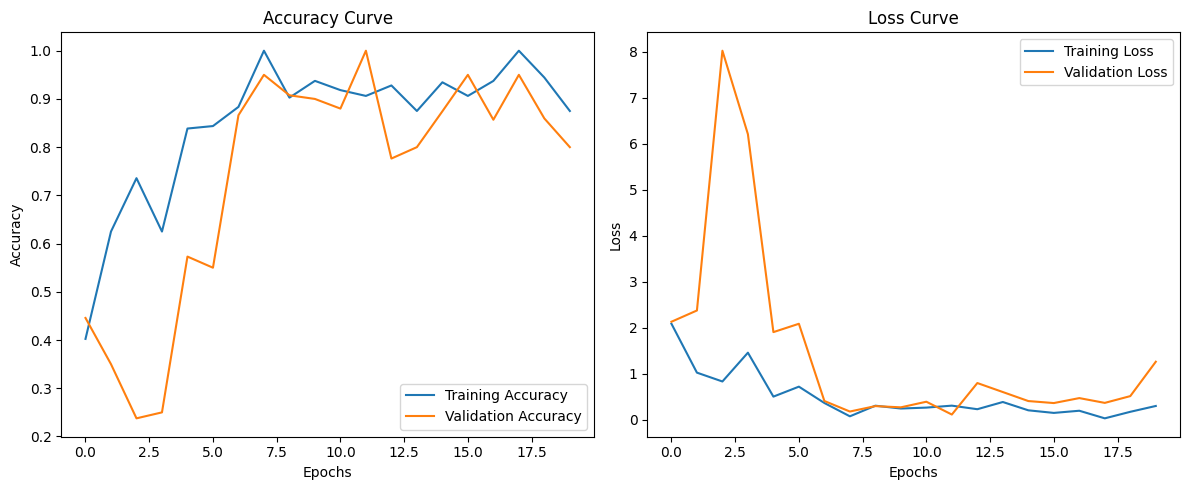

In [14]:
# Compile the model (if not already compiled)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Evaluate the Model
evaluation = model.evaluate(val_generator)  # Use val_generator instead of validation_data

# Display accuracy and loss metrics
print(f"Validation Loss: {evaluation[0]:.4f}")
print(f"Validation Accuracy: {evaluation[1]:.4f}")

# Plot accuracy and loss curves
plt.figure(figsize=(12, 5))

# Plot training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Make Predictions with the Model
Load a pre-trained model, preprocess an input image, and make predictions using the `predict` method. Display the predicted class label.

In [17]:
# Make Predictions with the Model

# Load the pre-trained model
model = tf.keras.models.load_model('C:\\Users\\vaisa\\OneDrive\\Documents\\Vaisaali\\Studies\\Programs\\Sem6\\Deep Learning\\alexnet_plant_disease_model.h5')

# Define the target class names
target_names = [
    'Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy',
    'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy',
    'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_',
    'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot',
    'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy',
    'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy',
    'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight',
    'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy',
    'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy',
    'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold',
    'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot',
    'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy'
]

# Function to preprocess the input image and make predictions
def make_prediction(image_path):
    # Load and preprocess the image
    img = Image.open(image_path).resize((224, 224))
    img_array = np.array(img) / 255.0  # Normalize pixel values
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Make predictions
    predictions = model.predict(img_array)
    predicted_class = target_names[np.argmax(predictions)]

    # Display the predicted class
    print(f"Predicted Class: {predicted_class}")

# Example usage
make_prediction(r"C:\Users\vaisa\.cache\kagglehub\datasets\abdallahalidev\plantvillage-dataset\versions\3\plantvillage dataset\color\Corn_(maize)___Common_rust_\RS_Rust 1597.JPG")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step
Predicted Class: Squash___Powdery_mildew
